In [201]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib.lines
import matplotlib as mpl
import sklearn.manifold
import sklearn.decomposition
import sklearn.cluster
import sklearn.svm
import h5py
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib import cm
import pandas as pd

## Training Properties

In [222]:
size = '64'
data_format = f'uncrop_{size}'
data_path = f'/media/andjela/SeagatePor1/LSSL/data/{data_format}/CP_longitudinal_noimg.h5' 
data = h5py.File(data_path, 'r')
print(np.array(data), np.array(data).shape)
sub_1 = np.array(data['sub-001'])
print('sub-001', sub_1.shape)
print(np.array(data['sub-036']['age_interval']))
print(np.array(data['sub-052']['ages']))

['sub-001' 'sub-002' 'sub-003' 'sub-004' 'sub-005' 'sub-006' 'sub-007'
 'sub-008' 'sub-009' 'sub-010' 'sub-011' 'sub-012' 'sub-013' 'sub-014'
 'sub-015' 'sub-016' 'sub-017' 'sub-018' 'sub-019' 'sub-020' 'sub-021'
 'sub-022' 'sub-023' 'sub-024' 'sub-025' 'sub-026' 'sub-027' 'sub-028'
 'sub-029' 'sub-030' 'sub-031' 'sub-032' 'sub-033' 'sub-034' 'sub-035'
 'sub-036' 'sub-037' 'sub-038' 'sub-039' 'sub-040' 'sub-041' 'sub-042'
 'sub-043' 'sub-044' 'sub-045' 'sub-046' 'sub-047' 'sub-048' 'sub-049'
 'sub-050' 'sub-051' 'sub-052' 'sub-053' 'sub-054' 'sub-055' 'sub-056'
 'sub-057' 'sub-058' 'sub-059' 'sub-060' 'sub-061' 'sub-062' 'sub-063'
 'sub-064'] (64,)
sub-001 (4,)
[0.     0.4722]
[3.0111 3.1444 3.2611 3.4083 3.6611 4.0944 4.3694 4.4833]


In [162]:
data_path = '/media/andjela/SeagatePor1/LSSL/data/uncrop/CP_longitudinal_img.h5' 
data = h5py.File(data_path, 'r')
print(np.array(data), np.array(data).shape)
sub_1 = np.array(data['sub-001'])
print('sub-001', int(sub_1.shape[0]))
print(np.array(data['sub-028']))
count = 0
for sub in list(np.array(data)):
    count += int(np.array(data[f'{sub}']).shape[0])
print(count)

['sub-001' 'sub-002' 'sub-003' 'sub-004' 'sub-005' 'sub-006' 'sub-007'
 'sub-008' 'sub-009' 'sub-010' 'sub-011' 'sub-012' 'sub-013' 'sub-014'
 'sub-015' 'sub-016' 'sub-017' 'sub-018' 'sub-019' 'sub-020' 'sub-021'
 'sub-022' 'sub-023' 'sub-024' 'sub-025' 'sub-026' 'sub-027' 'sub-028'
 'sub-029' 'sub-030' 'sub-031' 'sub-032' 'sub-033' 'sub-034' 'sub-035'
 'sub-036' 'sub-037' 'sub-038' 'sub-039' 'sub-040' 'sub-041' 'sub-042'
 'sub-043' 'sub-044' 'sub-045' 'sub-046' 'sub-047' 'sub-048' 'sub-049'
 'sub-050' 'sub-051' 'sub-052' 'sub-053' 'sub-054' 'sub-055' 'sub-056'
 'sub-057' 'sub-058' 'sub-059' 'sub-060' 'sub-061' 'sub-062' 'sub-063'
 'sub-064'] (64,)
sub-001 5
['sub-028_ses-001_rigid_T1w_64.nii.gz'
 'sub-028_ses-002_rigid_T1w_64.nii.gz'
 'sub-028_ses-003_rigid_T1w_64.nii.gz']
247


['sub-001' 'sub-002' 'sub-003' 'sub-004' 'sub-005' 'sub-006' 'sub-007'
 'sub-008' 'sub-009' 'sub-010' 'sub-011' 'sub-012' 'sub-013' 'sub-014'
 'sub-015' 'sub-016' 'sub-017' 'sub-018' 'sub-019' 'sub-020' 'sub-021'
 'sub-022' 'sub-023' 'sub-024' 'sub-025' 'sub-026' 'sub-027' 'sub-028'
 'sub-029' 'sub-030' 'sub-031' 'sub-032' 'sub-033' 'sub-034' 'sub-035'
 'sub-036' 'sub-037' 'sub-038' 'sub-039' 'sub-040' 'sub-041' 'sub-042'
 'sub-043' 'sub-044' 'sub-045' 'sub-046' 'sub-047' 'sub-048' 'sub-049'
 'sub-050' 'sub-051' 'sub-052' 'sub-053' 'sub-054' 'sub-055' 'sub-056'
 'sub-057' 'sub-058' 'sub-059' 'sub-060' 'sub-061' 'sub-062' 'sub-063'
 'sub-064'] (64,)
sub-001 5
['sub-001_ses-001_rigid_T1w_128.nii.gz'
 'sub-001_ses-002_rigid_T1w_128.nii.gz'
 'sub-001_ses-003_rigid_T1w_128.nii.gz'
 'sub-001_ses-004_rigid_T1w_128.nii.gz'
 'sub-001_ses-005_rigid_T1w_128.nii.gz']
234


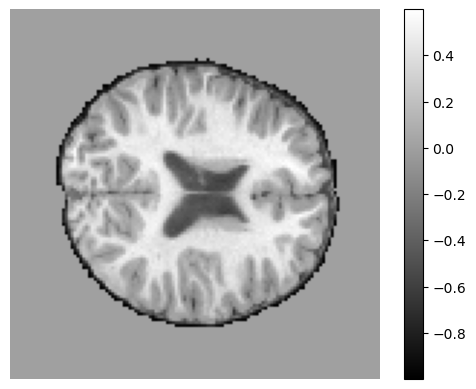

In [137]:
size = '128'
data_format = f'uncrop_{size}'
data_path = f'/media/andjela/SeagatePor1/LSSL/data/{data_format}/CP_longitudinal_img.h5' 
data = h5py.File(data_path, 'r')
print(np.array(data), np.array(data).shape)
sub_1 = np.array(data['sub-001'])
print('sub-001', int(sub_1.shape[0]))
print(np.array(data['sub-001']))

count = 0
for sub in list(np.array(data)):
    count += int(np.array(data[f'{sub}']).shape[0])
print(count)

img = np.array(data['sub-001'][f'sub-001_ses-003_rigid_T1w_{size}.nii.gz'])
# Extract the slice from the image data
slice_index = 64
slice_data_img = img[:, :, slice_index]
# Plot the slice using Matplotlib
plt.imshow(slice_data_img, cmap='gray')
plt.colorbar()
plt.axis('off')
plt.show()

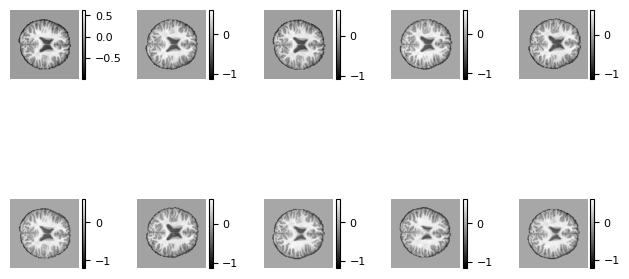

In [122]:
size = '128'
data_format = f'uncrop_{size}'
aug_data_path = f'/media/andjela/SeagatePor1/LSSL/data/{data_format}/CP_longitudinal_img_aug.h5' 
data_aug = h5py.File(aug_data_path, 'r')
# print(np.array(data_aug), np.array(data_aug).shape)
sub_1 = np.array(data_aug['sub-001'])
# print('sub-001', sub_1.shape)
# print(sub_1)
# print(np.array(data_aug['sub-001']['sub-001_ses-002_rigid_T1w_64.nii.gz']).shape)
img = np.array(data_aug['sub-001'][f'sub-001_ses-002_rigid_T1w_{size}.nii.gz'])
# Extract the slice from the image data
slice_index = 64
aug_index = 2
slice_data_img = img[aug_index, :, :, slice_index]

# Create a figure and an array of subplots
fig, axes = plt.subplots(2, 5, gridspec_kw={'height_ratios': [2, 5]})#, sharex=True, sharey=True)# gridspec_kw={'height_ratios': [2, 5]})

# Iterate over each subplot and plot the data
for i, ax in enumerate(axes.flat):
    # im = ax.imshow(np.zeros((64,64)))
    im = ax.imshow(img[i, :, :, slice_index], cmap='gray')  # Plot the data
    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)  # Add colorbar to subplot
    cbar.ax.tick_params(labelsize=8)  # Adjust colorbar tick label size
    ax.axis('off')

# Adjust the spacing between subplots
fig.tight_layout()

# plt.subplots_adjust(wspace=0, hspace=0)


# Show the plot
plt.show()



In [164]:
folds = 5
splits = ['train', 'test', 'val']

for i in range(folds):
    print(f'fold{i}')
    for split in splits:
        data_path = f'/media/andjela/SeagatePor1/LSSL/data/{data_format}/fold{i}_{split}_C.txt'
        df = pd.read_fwf(data_path)
        print(f'{split}', df.shape) #df.keys()
    print('----------------')


fold0
train (279, 5)
test (85, 5)
val (17, 5)
----------------
fold1
train (293, 5)
test (64, 5)
val (24, 5)
----------------
fold2
train (317, 5)
test (37, 5)
val (27, 5)
----------------
fold3
train (287, 5)
test (79, 5)
val (15, 5)
----------------
fold4
train (284, 5)
test (59, 5)
val (38, 5)
----------------


## Health Aging

In [207]:
# ckpt_path = '/media/andjela/SeagatePor1/LSSL/data/CP/LSP/'
ckpt_path = '/home/andjela/Documents/longitudinal-neighbourhood-embedding/ckpt/CP/LSP/'
# time_label = '2023_6_14_16_57' #ls=8192, bs=16, uncrop_128, aug
time_label = '2023_6_19_15_1' #ls=1024, bs=16, uncrop_64, aug
# time_label = '2023_6_15_11_54' #ls=1024, bs=16, uncrop_64, no aug
# time_label = '2023_6_5_11_51'  # ls=1024, bs=64  
# time_label = '2023_6_8_14_6'  # ls=1024, bs=16  
# time_label = '2023_6_12_12_4'  # ls=1024, bs=16, e: 150, crop 
# time_label = '2023_6_12_11_30'  # ls=1024, bs=16, e: 150, uncrop
# time_label = '2023_6_12_15_50'  # ls=1024, bs=64, e: 300, crop
data_train = h5py.File(ckpt_path+time_label+'/result_train/results_allbatch.h5', 'r')
data = h5py.File(ckpt_path+time_label+'/result_test/results_alldataset.h5', 'r')

In [208]:
print(type(data))
print(np.array(data))
print(np.array(data_train))

<class 'h5py._hl.files.File'>
['age' 'img1' 'img2' 'interval' 'label' 'recon1' 'recon2' 'z1' 'z2']
['age' 'img1' 'img2' 'interval' 'label' 'recon1' 'recon2' 'z1' 'z2']


In [209]:
img_1 = np.array(data['img1'])
img_2 = np.array(data['img2'])
print('img1', img_1.shape, 'img2', img_2.shape)
age = np.array(data['age'])
print('age', age.shape)
interval = np.array(data['interval'])
print('interval', interval.shape)
label = np.array(data['label'])
print('label', label.shape)
recon_1 = np.array(data['recon1'])
recon_2 = np.array(data['recon2'])
print('recon1', recon_1.shape, 'recon2', recon_2.shape)
z_1 = np.array(data['z1'])
z_2 = np.array(data['z2'])
print('z1', z_1.shape, 'z2', z_2.shape)

img1 (38, 1, 64, 64, 64) img2 (38, 1, 64, 64, 64)
age (38,)
interval (38,)
label (0,)
recon1 (38, 1, 64, 64, 64) recon2 (38, 1, 64, 64, 64)
z1 (38, 1024) z2 (38, 1024)


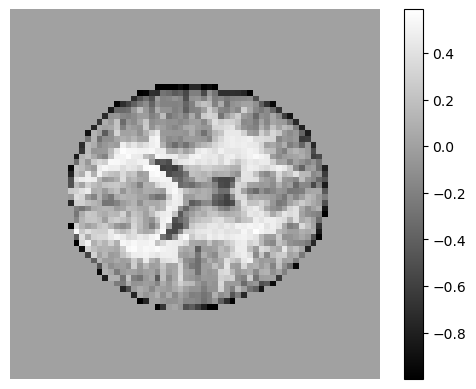

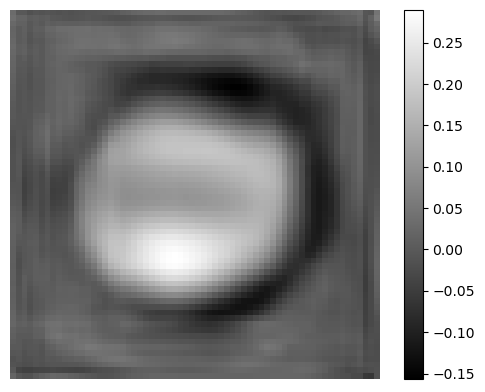

In [211]:
# Extract the slice from the image data
slice_index = 32
sub_index = 30
slice_data_img = np.squeeze(img_1)[sub_index, :, :, slice_index]
slice_data_recon = np.squeeze(recon_1)[sub_index, :, :, slice_index]
# Plot the slice using Matplotlib
plt.imshow(slice_data_img, cmap='gray')
plt.colorbar()
plt.axis('off')
plt.show()
plt.imshow(slice_data_recon, cmap='gray')
plt.colorbar()
plt.axis('off')
plt.show()

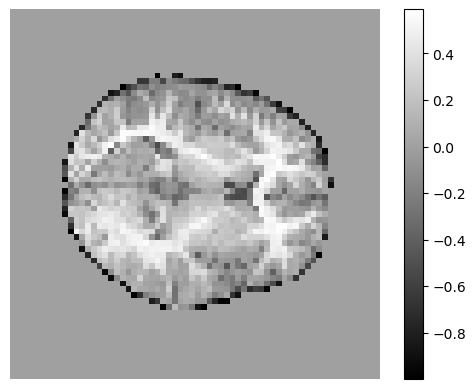

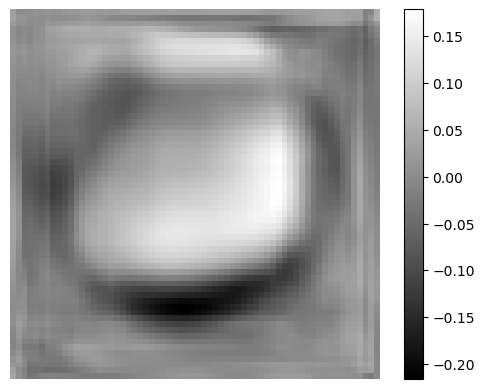

In [212]:
# Extract the slice from the image data
slice_index = 32
sub_index = 30
slice_data_img = np.squeeze(img_2)[sub_index, :, :, slice_index]
slice_data_recon = np.squeeze(recon_2)[sub_index, :, :, slice_index]
# Plot the slice using Matplotlib
plt.imshow(slice_data_img, cmap='gray')
plt.colorbar()
plt.axis('off')
plt.show()
plt.imshow(slice_data_recon, cmap='gray')
plt.colorbar()
plt.axis('off')
plt.show()

In [213]:
# label_raw = np.array(data['label']).astype(int)
# label_raw = (label_raw > 0).astype(int)
z1_raw = np.array(data['z1'])
z2_raw = np.array(data['z2'])
interval_raw = np.array(data['interval'])
age_raw = np.array(data['age'])
delta_z_raw = (z2_raw - z1_raw) / np.expand_dims(interval_raw, 1) #speed of brain aging; z2-z1/delta(t)

# label_raw_train = np.array(data_train['label']).astype(int)
# label_raw_train = (label_raw_train > 0).astype(int)
z1_raw_train = np.array(data_train['z1'])
z2_raw_train = np.array(data_train['z2'])
interval_raw_train = np.array(data_train['interval'])
age_raw_train = np.array(data_train['age'])
delta_z_raw_train = (z2_raw_train - z1_raw_train) / np.expand_dims(interval_raw_train, 1)

print('Speed of brain aging \n', 'test', delta_z_raw.shape, 'train', delta_z_raw_train.shape)

Speed of brain aging 
 test (38, 1024) train (318, 1024)


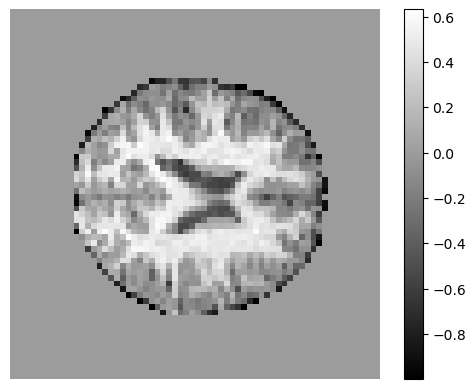

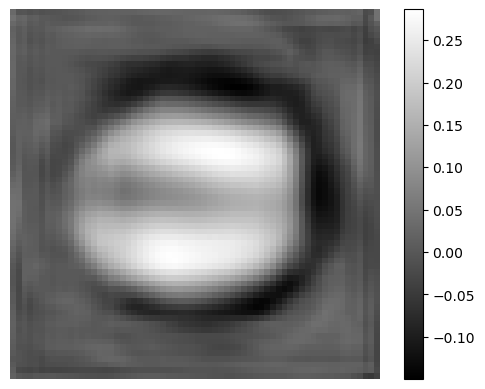

In [214]:
# Verify how image is reconstructed using training data
img_1_train = np.array(data_train['img1'])
img_2_train = np.array(data_train['img2'])
age_train = np.array(data_train['age'])
interval_train = np.array(data_train['interval'])
recon_1_train = np.array(data_train['recon1'])
recon_2_train = np.array(data_train['recon2'])
z_1 = np.array(data_train['z1'])
z_2 = np.array(data_train['z2'])

# print(np.squeeze(img_2_train).shape) #(280, 128, 128, 128)
# Extract the slice from the image data
slice_index = 32
sub_index = 70
slice_data_img = np.squeeze(img_2_train)[sub_index, :, :, slice_index]
slice_data_recon = np.squeeze(recon_2_train)[sub_index, :, :, slice_index]
# Plot the slice using Matplotlib
plt.imshow(slice_data_img, cmap='gray')
plt.colorbar()
plt.axis('off')
plt.show()
plt.imshow(slice_data_recon, cmap='gray')
plt.colorbar()
plt.axis('off')
plt.show()

### With only intervals > 1

In [215]:
# PCA on train set and apply on test set
idx_sel = np.sort(np.where(interval_raw_train>1)[0]) #need to do this pre-selection? technically can take even small variations in time
num_sel = idx_sel.shape[0]
# print('idx_sel', idx_sel)
print('num_sel', num_sel)

feats = np.concatenate([z1_raw_train[idx_sel], z2_raw_train[idx_sel]], 0)
print('feats', feats.shape)
pca = sklearn.decomposition.PCA(n_components=2)
zs = pca.fit_transform(feats)
print('zs', zs.shape)
z1 = zs[:num_sel]
z2 = zs[num_sel:2*num_sel]
# label = label_raw_train[idx_sel]
age = age_raw_train[idx_sel]
delta_z = (z2 - z1) / np.expand_dims(interval_raw_train[idx_sel], 1)

num_sel_test = z1_raw.shape[0]
feats_test = np.concatenate([z1_raw, z2_raw], 0)
zs_test = pca.transform(feats_test)
z1_test = zs_test[:num_sel_test]
z2_test = zs_test[num_sel_test:2*num_sel_test]
# label_test = label_raw
age_test = age_raw
delta_z_test = (z2_test - z1_test) / np.expand_dims(interval_raw, 1)

num_sel 160
feats (320, 1024)
zs (320, 2)


In [216]:
# fit curve by LME
data_fit = {'y': np.concatenate([z1[:,1], z1[:,1]+delta_z[:,1]], 0), 
            'x': np.concatenate([z1[:,0], z1[:,0]+delta_z[:,0]], 0), 
            'subj': np.concatenate([idx_sel, idx_sel], 0)}
data_fit['x2'] = data_fit['x']**2
# model = smf.mixedlm(endogeneous variables, exogenous variables, groups)
md = smf.mixedlm("y ~ x + x2", data_fit, groups=data_fit["subj"], re_formula="~x")
mdf = md.fit(method=["lbfgs"])
print(mdf.summary())


         Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: y        
No. Observations:  320     Method:             REML     
No. Groups:        160     Scale:              0.1641   
Min. group size:   2       Log-Likelihood:     -302.3281
Max. group size:   2       Converged:          Yes      
Mean group size:   2.0                                  
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept     -0.175    0.054 -3.248 0.001 -0.280 -0.069
x             -0.339    0.048 -7.037 0.000 -0.433 -0.244
x2             0.075                                    
Group Var      0.332    0.169                           
Group x x Cov  0.007    0.059                           
x Var          0.000                                    



/home/andjela/anaconda3/envs/lssl/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/home/andjela/anaconda3/envs/lssl/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/andjela/anaconda3/envs/lssl/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2705: RuntimeWarning: invalid value encountered in sqrt
  sdf[0:self.k_fe, 1] = np.sqrt(np.diag(self.cov_params()[0:self.k_fe]))


In [217]:
# linear mixed effect model, robust version is computed in R
x_line = np.linspace(np.min(z1[:,0]), np.max(z1[:,0]))
# uncrop_128
y_line = -0.175 - 0.339 * x_line + 0.075 * x_line**2

### With all age intervals

In [178]:
# PCA on train set and apply on test set
num_sel_train = z1_raw_train.shape[0] #325

feats = np.concatenate([z1_raw_train, z2_raw_train], 0)
print('feats', feats.shape)
pca = sklearn.decomposition.PCA(n_components=2)
zs = pca.fit_transform(feats)
print('zs', zs.shape)
z1 = zs[:num_sel_train]
z2 = zs[num_sel_train:2*num_sel_train]
age = age_raw_train
delta_z = (z2 - z1) / np.expand_dims(interval_raw_train, 1)

num_sel_test = z1_raw.shape[0]
feats_test = np.concatenate([z1_raw, z2_raw], 0)
zs_test = pca.transform(feats_test)
z1_test = zs_test[:num_sel_test]
z2_test = zs_test[num_sel_test:2*num_sel_test]
# label_test = label_raw
age_test = age_raw
delta_z_test = (z2_test - z1_test) / np.expand_dims(interval_raw, 1)

feats (560, 1024)
zs (560, 2)


In [151]:
# fit curve by LME
data_fit = {'y': np.concatenate([z1[:,1], z1[:,1]+delta_z[:,1]], 0), 
            'x': np.concatenate([z1[:,0], z1[:,0]+delta_z[:,0]], 0), 
            'subj': np.concatenate([range(z1_raw_train.shape[0]), range(z1_raw_train.shape[0])], 0)}
data_fit['x2'] = data_fit['x']**2
# model = smf.mixedlm(endogeneous variables, exogenous variables, groups)
# re_formula: a one-sided formula defining the variance structure of the model (default gives a random intercept for each group), from statsmodels doc
md = smf.mixedlm("y ~ x + x2", data_fit, groups=data_fit["subj"], re_formula="~x")
mdf = md.fit(method=["lbfgs"])
print(mdf.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: y         
No. Observations: 560     Method:             REML      
No. Groups:       280     Scale:              0.9316    
Min. group size:  2       Log-Likelihood:     -1348.2350
Max. group size:  2       Converged:          Yes       
Mean group size:  2.0                                   
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept     -0.453    0.156 -2.903 0.004 -0.759 -0.147
x             -0.095    0.054 -1.754 0.079 -0.202  0.011
x2             0.033    0.007  4.429 0.000  0.018  0.047
Group Var      4.949    1.251                           
Group x x Cov  0.090    0.133                           
x Var          0.562    0.159                           



In [152]:
# linear mixed effect model, robust version is computed in R
x_line = np.linspace(np.min(z1[:,0]), np.max(z1[:,0]))
# y_line = -0.07 - 0.002 * x_line + 0.004 * x_line**2
# y_line = 0.075 + 0.189 * x_line + 0.031 * x_line**2
#Cropped
# y_line = -0.045 - 0.066 * x_line + 0.001 * x_line**2
# y_line = 0.178 - 0.015 * x_line - 0.001 * x_line**2
#Uncropped
# y_line = 0.017 + 0.105 * x_line - 0.011 * x_line**2
y_line = -0.453 - 0.095 * x_line + 0.033 * x_line**2

In [218]:
z1.shape
print(delta_z.shape)
print(f'delta_z < 0 -> {np.sum(delta_z < 0)}/{(np.sum(delta_z > 0)+ np.sum(delta_z < 0))}')
print(f'delta_z > 0 -> {np.sum(delta_z > 0)}/{(np.sum(delta_z > 0)+ np.sum(delta_z < 0))}')


(160, 2)
delta_z < 0 -> 169/320
delta_z > 0 -> 151/320


(160,)


/tmp/ipykernel_2018369/3784702743.py:20: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(cm.ScalarMappable(cmap='viridis'), ticks=[0,1.0], shrink=0.75)


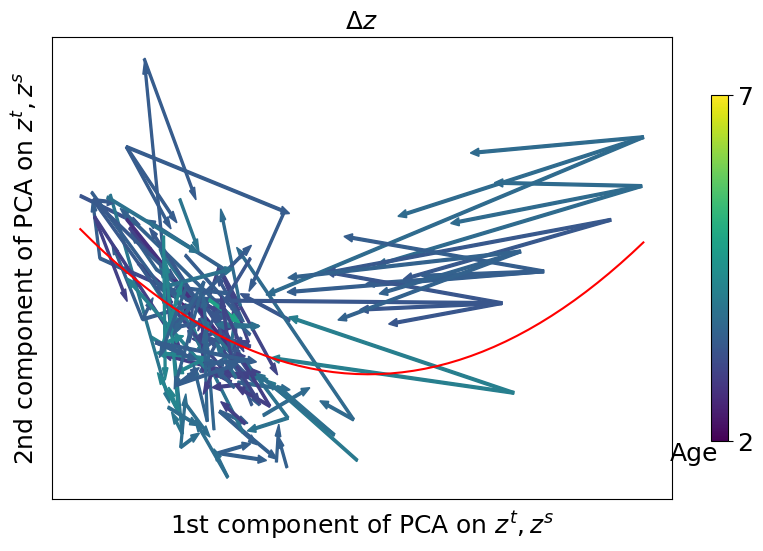

In [220]:
np.random.seed(2)
color_list = np.array(['c', 'm'])
# class_list = ['NC', 'AUD']
# age_max, age_min = 80, 30
age_max, age_min = 7, 2
age_range = age_max - age_min
print(age.shape)
# age = np.clip(age, a_min=age_min, a_max=age_max)

plt.figure(figsize=(10,6))
idx_sel_list = np.arange(z1.shape[0])
for idx in idx_sel_list:
    plt.arrow(z1[idx,0], z1[idx,1], delta_z[idx,0], delta_z[idx,1], width=0.03, color=cm.viridis((age[idx]-age_min)/age_range))
plt.plot(x_line, y_line, 'r')
# plt.xlim(-5, 15)
# plt.ylim(-4, 5.8)
plt.title('$\Delta z$', fontsize=18)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
cbar = plt.colorbar(cm.ScalarMappable(cmap='viridis'), ticks=[0,1.0], shrink=0.75)
# cbar.ax.set_yticklabels(['21', '82'], fontsize=18)
cbar.ax.set_yticklabels(['2', '7'], fontsize=18)
cbar.set_label('Age', labelpad=-43, y=-0., rotation=0, fontsize=18)
plt.xlabel('1st component of PCA on $z^t, z^s$', fontsize=18)
plt.ylabel('2nd component of PCA on $z^t, z^s$', fontsize=18)
plt.savefig('figure_CP_train.png')

## ADNI

In [14]:
ckpt_path = '../ckpt/ADNI/'
time_label = 'LSP/2021_2_1_10_3'  # ls=1024, bs=64
data_train = h5py.File(ckpt_path+time_label+'/result_train/results_allbatch.h5', 'r')
data = h5py.File(ckpt_path+time_label+'/result_test/results_alldataset.h5', 'r')

In [17]:
img1 = data['img1']
img2 = data['img2']
recon1 = data['recon1']
label_raw = np.array(data['label']).astype(int)
z1_raw = np.array(data['z1'])
z2_raw = np.array(data['z2'])
interval_raw = np.array(data['interval'])
age_raw = np.array(data['age'])
delta_z_raw = (z2_raw - z1_raw) / np.expand_dims(interval_raw, 1)

label_raw_train = np.array(data_train['label']).astype(int)
z1_raw_train = np.array(data_train['z1'])
z2_raw_train = np.array(data_train['z2'])
interval_raw_train = np.array(data_train['interval'])
age_raw_train = np.array(data_train['age'])
delta_z_raw_train = (z2_raw_train - z1_raw_train) / np.expand_dims(interval_raw_train, 1)

In [19]:
# PCA on train set and apply on test set
num_sel = np.where(interval_raw_train>0.5)[0].shape[0]
idx_sel = np.where(interval_raw_train>0.5)[0]
feats = np.concatenate([z1_raw_train[idx_sel], z2_raw_train[idx_sel]], 0)
pca = sklearn.decomposition.PCA(n_components=2)
zs = pca.fit_transform(feats)
z1 = zs[:num_sel]
z2 = zs[num_sel:2*num_sel]
delta_z = (z2 - z1) / np.expand_dims(interval_raw_train[idx_sel], 1)
label = label_raw_train[idx_sel]
age = age_raw_train[idx_sel]

num_sel_test = z1_raw.shape[0]
feats_test = np.concatenate([z1_raw, z2_raw], 0)
zs_test = pca.transform(feats_test)
z1_test = zs_test[:num_sel_test]
z2_test = zs_test[num_sel_test:2*num_sel_test]
delta_z_test = (z2_test - z1_test) / np.expand_dims(interval_raw, 1)
label_test = label_raw
age_test = age_raw

In [20]:
# fit curve by LME
data_fit = {'y': z1[:,1], 'x': z1[:,0], 'x2': z1[:,0]**2, 'subj': idx_sel}
md = smf.mixedlm("y ~ x + x2", data_fit, groups=data_fit["subj"], re_formula="~x")
mdf = md.fit(method=["lbfgs"])
print(mdf.summary())

/home/jiahong/miniconda3/envs/ml/lib/python3.6/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


          Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: y         
No. Observations:  2562    Method:             REML      
No. Groups:        2562    Scale:              0.5851    
Min. group size:   1       Log-Likelihood:     -4340.0773
Max. group size:   1       Converged:          Yes       
Mean group size:   1.0                                   
---------------------------------------------------------
              Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept     -0.520    0.037 -13.941 0.000 -0.593 -0.447
x             -0.021    0.002  -8.936 0.000 -0.026 -0.016
x2             0.003    0.000  17.725 0.000  0.002  0.003
Group Var      1.334                                     
Group x x Cov  0.041                                     
x Var          0.002                                     



In [25]:
# linear mixed effect model, robust version is computed in R
x_line = np.linspace(np.min(z1[:,0]), np.max(z1[:,0]))
# y_line = -0.383 - 0.017 * x_line + 0.002 * x_line**2
y_line = -0.52 - 0.021 * x_line + 0.003 * x_line**2

-26.461952209472656 43.2308464050293 -5.792330741882324 6.165668964385986


No handles with labels found to put in legend.


Text(0, 0.5, '2nd component of PCA on $z^t, z^s$')

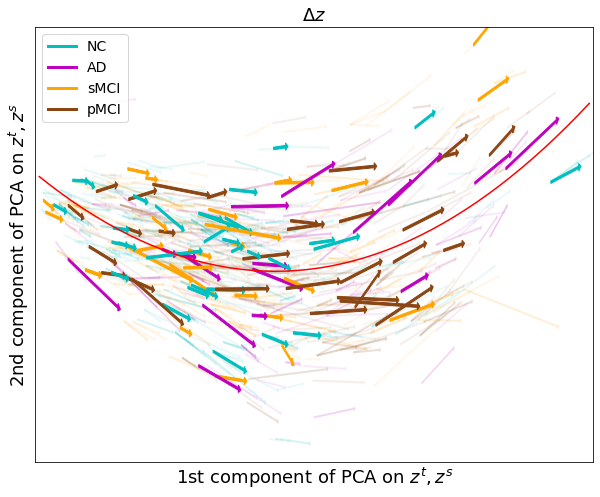

In [26]:
# training set
np.random.seed(2)
# color_list = np.array(['c', 'k', 'm', 'y', 'b'])
color_list = np.array(['c', 'k', 'm', 'orange', 'saddlebrown'])
class_list = ['NC', 'MCI', 'AD', 'sMCI', 'pMCI']
plt.figure(figsize=(10,8))
if z1.shape[0] > 100:
    idx_sel_list = np.random.choice(z1.shape[0], z1.shape[0]//2)
else:
    idx_sel_list = np.arange(z1.shape[0])
x_min = min(np.min(z1[:,0]), np.min(z1[:,0]+delta_z[:,0])) - 0.5
x_max = min(np.max(z1[:,0]), np.max(z1[:,0]+delta_z[:,0])) + 0.5
y_min = min(np.min(z1[:,1]), np.min(z1[:,1]+delta_z[:,1])) - 0.5
y_max = min(np.max(z1[:,1]), np.max(z1[:,1]+delta_z[:,1])) + 0.5
print(x_min, x_max, y_min, y_max)

for idx in idx_sel_list:
    plt.arrow(z1[idx,0], z1[idx,1], delta_z[idx,0], delta_z[idx,1], width=(x_max-x_min)*0.0005, color=color_list[label[idx]], alpha=0.05)
idx_sel_list = np.random.choice(z1.shape[0], 100)
for idx in idx_sel_list:
    plt.arrow(z1[idx,0], z1[idx,1], delta_z[idx,0], delta_z[idx,1], width=(x_max-x_min)*0.001, color=color_list[label[idx]])    
ad_idx = np.where(label==2)[0]

plt.legend()
plt.plot(x_line, y_line, 'r')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.title('$\Delta z$', fontsize=18)
colors = ['c', 'm', 'orange', 'saddlebrown']
lines = [matplotlib.lines.Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
labels = ['NC', 'AD', 'sMCI', 'pMCI']
plt.legend(lines, labels, prop={'size': 14})
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.xlabel('1st component of PCA on $z^t, z^s$', fontsize=18)
plt.ylabel('2nd component of PCA on $z^t, z^s$', fontsize=18)

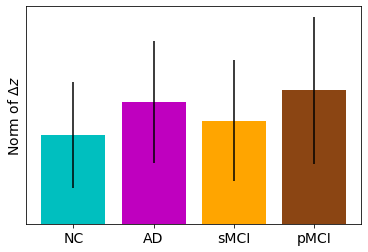

In [28]:
x = ['NC', 'AD', 'sMCI', 'pMCI']
color_list = np.array(['c', 'm', 'orange', 'saddlebrown'])
norm_delta_z = np.sqrt(np.sum(delta_z**2, 1))

mean = [np.mean(norm_delta_z[label==0]), np.mean(norm_delta_z[label==2]), np.mean(norm_delta_z[label==3]), np.mean(norm_delta_z[label==4])]
std = [np.std(norm_delta_z[label==0]), np.std(norm_delta_z[label==2]), np.std(norm_delta_z[label==3]), np.std(norm_delta_z[label==4])]
x_pos = [i for i, _ in enumerate(x)]

for i in range(4):
    plt.bar(i, mean[i], color=color_list[i], yerr=std[i])
plt.ylabel('Norm of ' + r'$\Delta z$', fontsize=14)
plt.xticks(x_pos, x, fontsize=14)
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.show()

Text(0, 0.5, '2nd component of PCA on $z^t, z^s$')

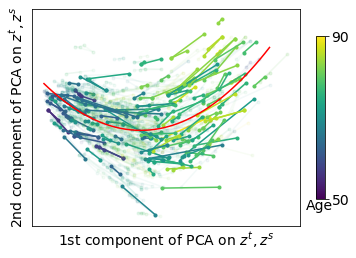

In [40]:
txtfile = pd.read_csv('../data/ADNI/fold0_train_NC_AD_pMCI_sMCI.txt', sep=' ', header=None)
idx_sel = np.where(interval_raw_train>0.5)[0]
pairs = np.array(txtfile[[3,4]].iloc[idx_sel])

np.random.seed(0)
age_max, age_min = 90, 50
age_range = age_max - age_min

for idx in range(idx_sel.shape[0]):
    if pairs[idx,1] - pairs[idx,0] > 1:
        continue
    plt.plot([z1[idx,0],z2[idx,0]], [z1[idx,1],z2[idx,1]], '.-', color=cm.viridis((age[idx]-age_min)/age_range), alpha=0.05)
    if age[idx] < 80:
        if np.random.rand() > 0.85:
            plt.plot([z1[idx,0],z2[idx,0]], [z1[idx,1],z2[idx,1]], '.-', color=cm.viridis((age[idx]-age_min)/age_range))
    if age[idx] > 80:
        if np.random.rand() > 0.6:
            plt.plot([z1[idx,0],z2[idx,0]], [z1[idx,1],z2[idx,1]], '.-', color=cm.viridis((age[idx]-age_min)/age_range))
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
cbar = plt.colorbar(cm.ScalarMappable(cmap='viridis'), ticks=[0,1.0], shrink=0.75)
cbar.ax.set_yticklabels(['50', '90'], fontsize=14)
cbar.set_label('Age', labelpad=-30, y=-0., rotation=0, fontsize=14)
plt.plot(x_line, y_line, 'r')
plt.xlabel('1st component of PCA on $z^t, z^s$', fontsize=14)
plt.ylabel('2nd component of PCA on $z^t, z^s$', fontsize=14)